In [1]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
%matplotlib inline

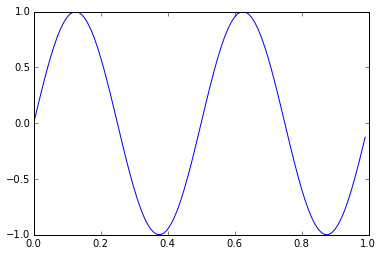

In [2]:
t = np.arange(0.0, 1.0, 0.01)
freq = 2
y = np.sin(freq*2*t*np.pi)
plt.plot(t, y)

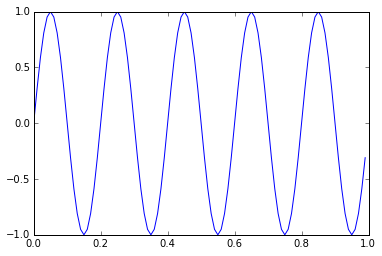

In [3]:
freq2 = 5
y2 = np.sin(freq2*2*t*np.pi)
plt.plot(t, y2)

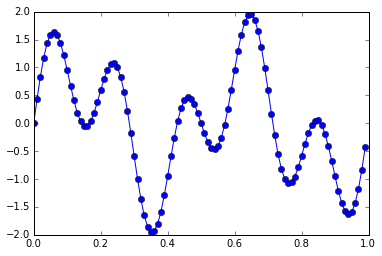

In [4]:
plt.plot(t, y+y2, 'o-')

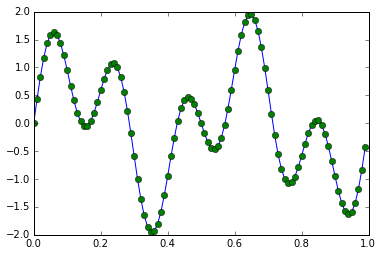

In [5]:
yadd = y+y2
ysamp = yadd[::5]
tsamp = t[::5]
plt.plot(t, yadd)
plt.plot(t, yadd, 'o')

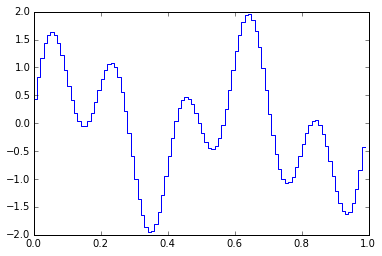

In [6]:
plt.step(t, yadd)


image file <open file u'/Users/aboyle/.virtualenvs/dsp/lib/python2.7/site-packages/matplotlib/mpl-data/sample_data/grace_hopper.png', mode 'rb' at 0x108feb5d0>
image (600, 512, 3)


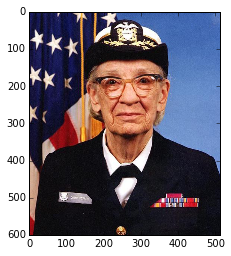

In [7]:
image_file = cbook.get_sample_data('grace_hopper.png')
print 'image file', image_file
hopper = plt.imread(image_file)
print 'image', hopper.shape
plt.imshow(hopper)

In [8]:
def rgb2grey(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = (0.2989 * r) + (0.5870 * g) + (0.1140 * b)
#     grey = (0.3333 * r) + (0.3333 * g) + (0.3333 * b)
    return grey
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1440])


(600, 512)
0.0
0.9999


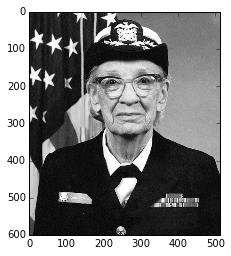

In [9]:

grey_hopper = rgb2grey(hopper)
print grey_hopper.shape
print grey_hopper.min()
print grey_hopper.max()
plt.imshow(grey_hopper, cmap=plt.cm.Greys_r)

(540, 960, 3)


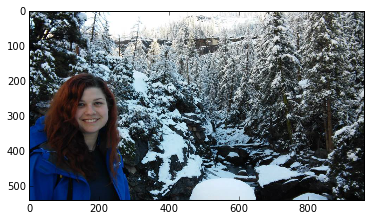

In [10]:
yosam = plt.imread('yosemite.jpg')
print yosam.shape
plt.imshow(yosam)

0
254


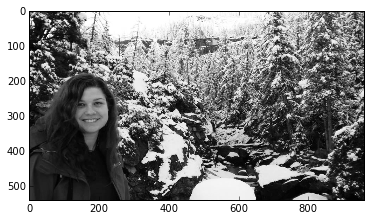

In [11]:
grey_me = rgb2grey(yosam).astype(int)
print np.amin(grey_me)
print np.amax(grey_me)
plt.imshow(grey_me, cmap=plt.cm.Greys_r)

flattened shape (518400,)


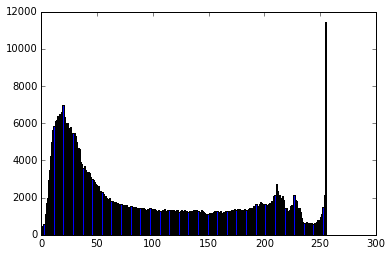

In [12]:
# bins, edges = np.histogram(grey_me[::-1], bins=256, range=(0,256))
# print bins, edges
flatten = grey_me.flatten()
print 'flattened shape', flatten.shape
plt.hist(flatten, bins=256, range=(0,256));

In [13]:
bins, edges = np.histogram(flatten, bins=256, range=(0,256))
npx = len(flatten)
gs_transform = (np.cumsum(bins)/float(npx))*256
# print bins, gs_transform

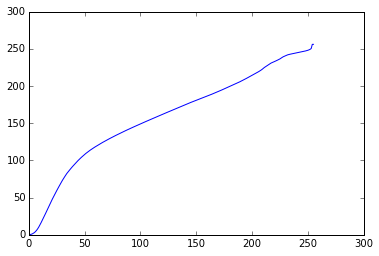

In [14]:
plt.plot(gs_transform)

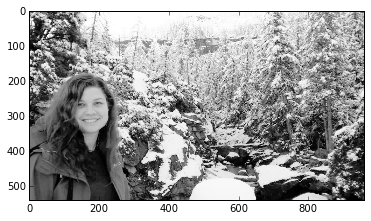

In [15]:
contrast_adjusted = gs_transform[flatten]
contrast_adjusted = contrast_adjusted.reshape(540, 960)
plt.imshow(contrast_adjusted, cmap=plt.cm.Greys_r)

In [16]:
# edge detection/enhancement


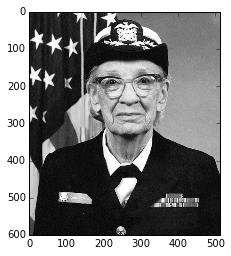

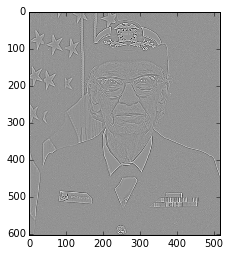

In [31]:
k=1
s = -k/8.
edge_only_kernel = np.array([[-0.125,-0.125,-0.125], [-0.125,1,-0.125], [-0.125,-0.125,-0.125]])
edge_kernel = np.array([[s,s,s], [s,k+1,s], [s,s,s]])
gauss_kernel = np.array([[1.,2.,1.], [2.,4.,2.], [1.,2.,1.]])
emboss_kernel = np.array([[0,0,0], [0,1,0], [0,0,-1]])
edgy = sg.convolve(grey_hopper, gauss_kernel)
edgy = sg.convolve(edgy, edge_only_kernel)
plt.imshow(grey_hopper, cmap=plt.cm.Greys_r)
plt.figure()
plt.imshow(edgy, cmap=plt.cm.Greys_r)